In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure',figsize=(14,8))

In [6]:
colnames=['date', 'time', 'destination', 'user', 'cohort', 'ip']
df = pd.read_csv('curriculum-access.txt', sep=' ', header=None, 
               names=colnames)
df['datetime'] = df.date.astype(str) + ' ' + df.time.astype(str)
df.datetime = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.drop(columns=['date','time'])

In [7]:
df.head(10)

,destination,user,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
2018-01-26 09:56:41,javascript-i/loops,2,22.0,98.106.20.62
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62
2018-01-26 09:56:48,javascript-i/functions,3,22.0,98.106.20.62
2018-01-26 09:56:59,javascript-i/loops,2,22.0,98.106.20.62


In [13]:
df.shape

(543596, 4)

In [14]:
# df[df.user.isin(df.user.value_counts().nlargest(10).index)]

In [34]:
df.user[df.user==531].resample('D').sum() / 531

datetime
2019-11-04    11.0
2019-11-05     9.0
2019-11-06    28.0
2019-11-07    24.0
2019-11-08    17.0
              ... 
2020-04-19     0.0
2020-04-20    17.0
2020-04-21     0.0
2020-04-22     0.0
2020-04-23     3.0
Freq: D, Name: user, Length: 172, dtype: float64

In [84]:
(df.user[df.user==531].resample('D').sum() / 531).index.max() - \
(df.user[df.user==531].resample('D').sum() / 531).index.min()

Timedelta('171 days 00:00:00')

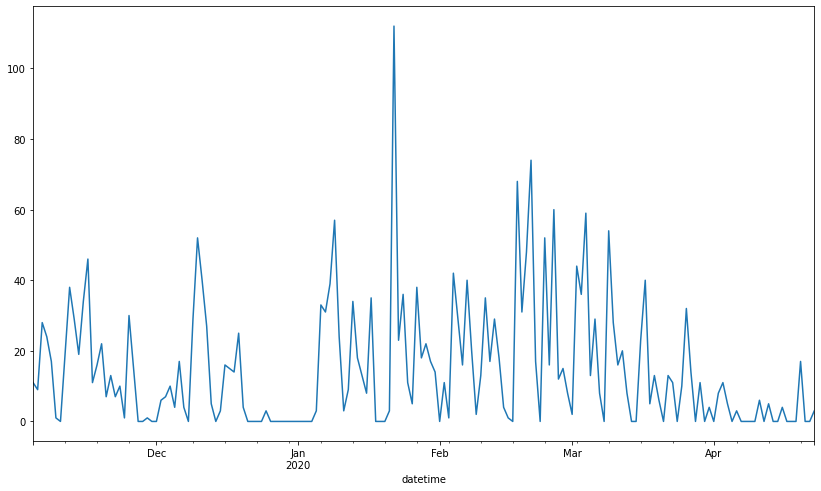

In [35]:
(df.user[df.user==531].resample('D').sum() / 531).plot()

In [124]:
def active_time_for_users(cohort):
    users = []
    people = []
    for person in df.user[df.cohort==cohort].unique():
            users.append((df.user[df.user==person].resample('D').sum()\
                / person).index.max() - \
            (df.user[df.user==person].resample('D').sum()\
                / person).index.min())
            people.append(person)
    info = pd.DataFrame({'people': people, 'users':users})
    return info

In [125]:
# people = []
# for person in df.user[df.cohort==55].unique():
#     people.append(person)
# people

In [134]:
# users = active_time_for_users(55)
# sns.barplot(users.sort_values('users').users, hue=people)

In [127]:
# pd.DataFrame({'people': people, 'users':users})

In [139]:
# person = 618
# (df.user[df.user==person].resample('D').sum() / person)

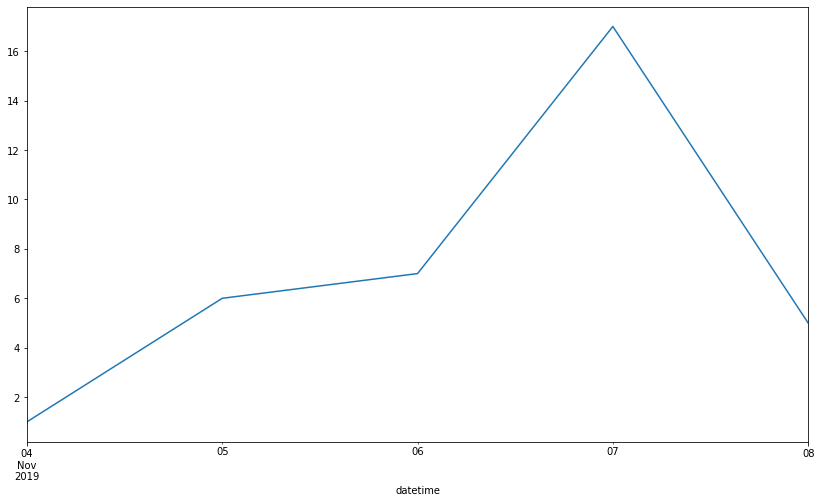

In [98]:
person = 529
(df.user[df.user==person].resample('D').sum() / person).plot()

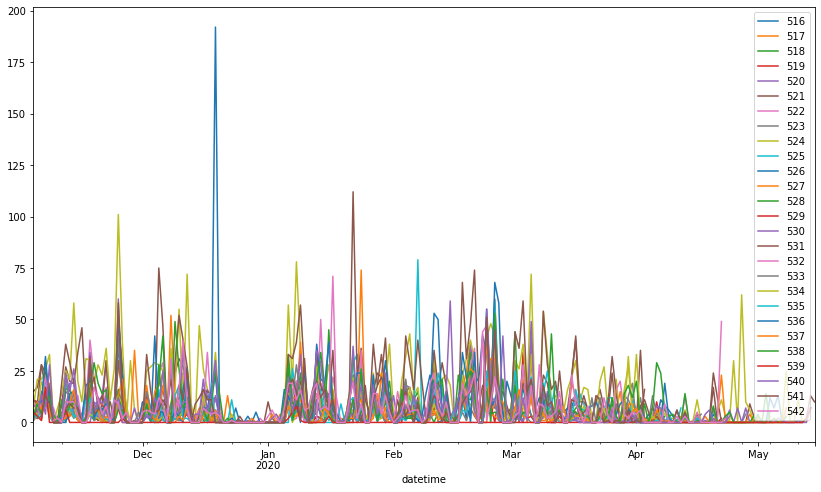

In [65]:
for person in df.user[df.cohort==52].unique():
    if person > 100:
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

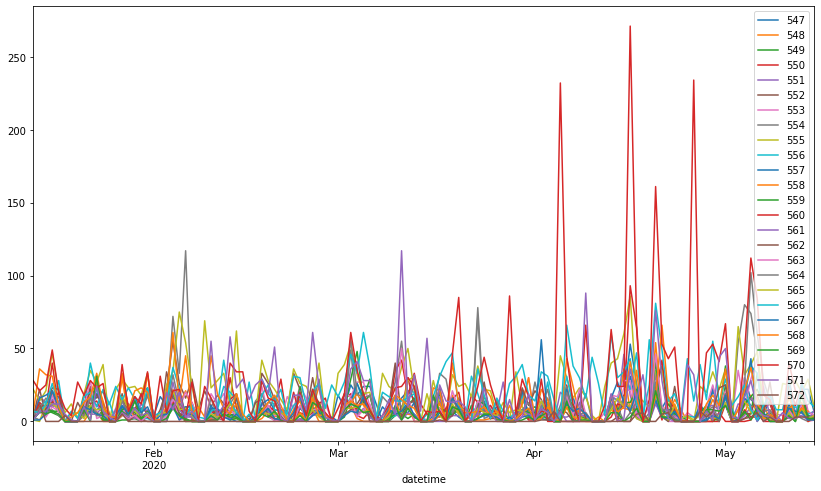

In [67]:
for person in df.user[df.cohort==53].unique():
    if person > 400:
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

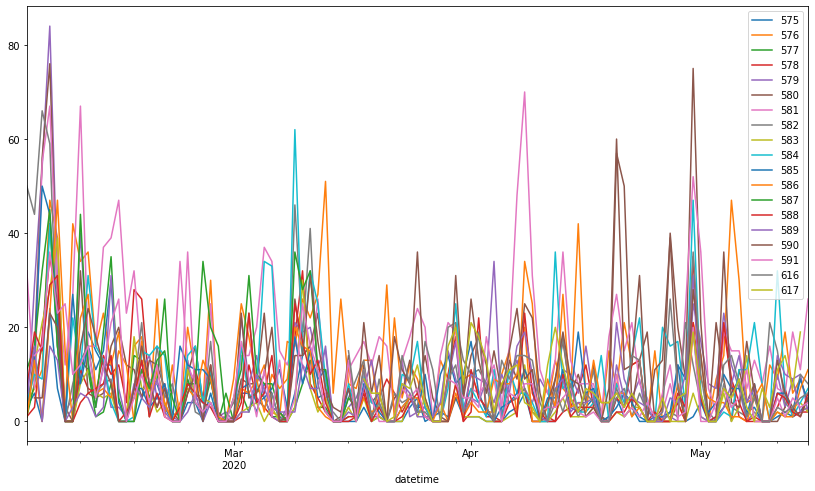

In [74]:
for person in df.user[df.cohort==55].unique():
    if person > 400:
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

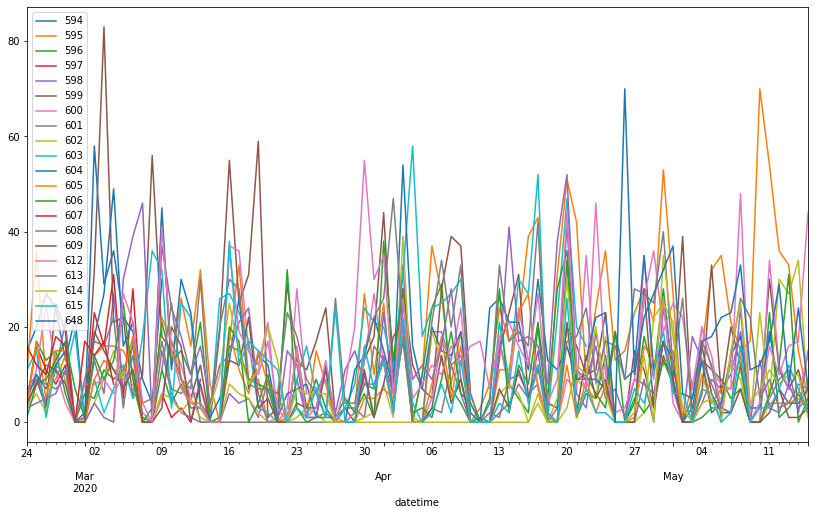

In [75]:
for person in df.user[df.cohort==56].unique():
    if person > 400:
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

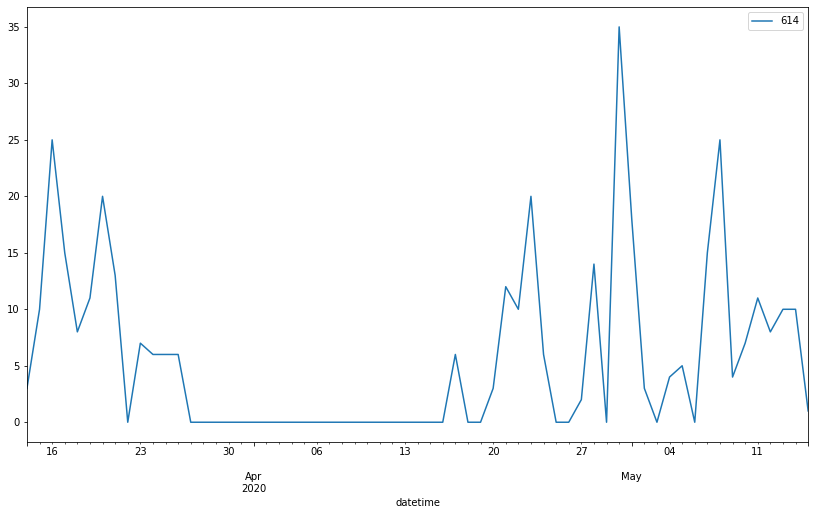

In [77]:
for person in df.user[df.cohort==56].unique():
    if person == 614:
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

In [ ]:
# # df is a dataframe with datetime as index and measure as the value. 
# span = 24
# ema = df.ewm(span=span, adjust=False).mean()
# stdev = df.ewm(span=span, adjust=False).std()
# # we want the following values to all be associated with the following target date/value, so we will compute them
# # and then change to index to represent the following time period, essentially shifting each value down one 
# # (or forward in terms of date). Basically, we will be comparing the value of one day to the ema computed through
# # the previous day (and the ub and lb computed from that ema)...that way we are not using our the value from our 
# # target date in the computation of the EMA we will compare that value to. 
# ema = pd.DataFrame({'ema': ema})
# stdev = pd.DataFrame({'stdev': stdev})
# previous_val = pd.DataFrame({'previous_val': df})
# prev_day_df = stdev.join(ema, how='left')
# prev_day_df = prev_day_df.join(previous_val, how='left')
# prev_day_df.fillna(0, inplace = True)
# my_index = df.index[1:]
# prev_day_df = prev_day_df[:-1].reset_index().set_index(my_index).drop(columns = ['index'])
# target_val = pd.DataFrame({'target_val': df})
# df = target_val.join(prev_day_df, how='left')
# df.fillna(0, inplace = True)
# # compute the upper and lower band
# df['ub'] = df['ema'] + 3*df['stdev']
# df['lb'] = df['ema'] - 3*df['stdev']
# # compute percent b
# df['pct_b'] = (df['target_val'] - df['lb']) / (df['ub'] - df['lb'])